# Week 3

Trying a model with partial immunity
$$
\begin{align*}
S + I &\xrightarrow{\beta/N}I+I\\
I &\xrightarrow{k_1}R\\
I &\xrightarrow{k_2}S\\
\end{align*}
$$

First do the numerical simulations:

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from tqdm import tqdm

from bp_models.gillespie import run_ensemble_sir_partial_immunity

number_of_sims = 500
N = 1000
beta = 0.4
k1 = 0.1
k2 = 0.1


ts, Is, infections, max_t = run_ensemble_sir_partial_immunity(N, beta, k1, k2, number_of_sims)

100%|██████████| 500/500 [00:00<00:00, 11607.45it/s]


500it [00:01, 311.95it/s]
/tmp/ipykernel_47947/3809571340.py:11: RuntimeWarning: All-NaN slice encountered
  ax.plot(plot_t, np.nanmedian(padded_data, axis=0), 'k', linewidth=2, label="Median of active simulation")


Text(0, 0.5, '# Infected')

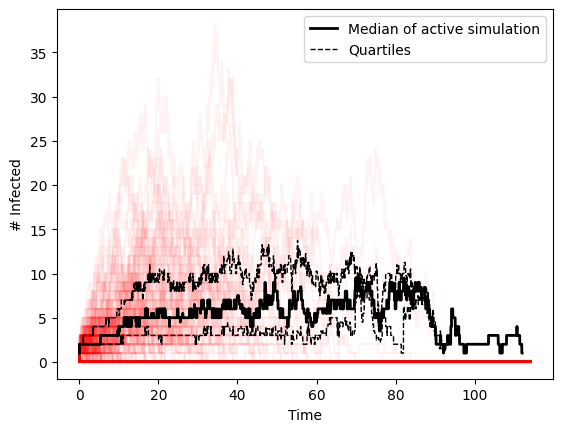

In [9]:
fig, ax = plt.subplots()
plot_t = np.linspace(0, max_t, num=int(max_t)*1000)
padded_data = np.empty((number_of_sims, plot_t.size))
for i, (t, s) in tqdm(enumerate(zip(ts, Is))):
    padded = interp1d(t, s, bounds_error=False, fill_value=0, kind='next')(plot_t)
    padded_data[i,:] = padded

padded_data = np.asarray(padded_data)
ax.plot(plot_t, padded_data.T, 'r', alpha=0.05)
padded_data[padded_data == 0] = np.nan
ax.plot(plot_t, np.nanmedian(padded_data, axis=0), 'k', linewidth=2, label="Median of active simulation")
quantile = ax.plot(plot_t, np.nanquantile(padded_data, 0.25, axis=0), 'k--', linewidth=1, label="Quartiles")
ax.plot(plot_t, np.nanquantile(padded_data, 0.75, axis=0), 'k--', linewidth=1, label="_nolegend_")

ax.legend()

ax.set_xlabel("Time")
ax.set_ylabel("# Infected")

(0.0, 1.0)

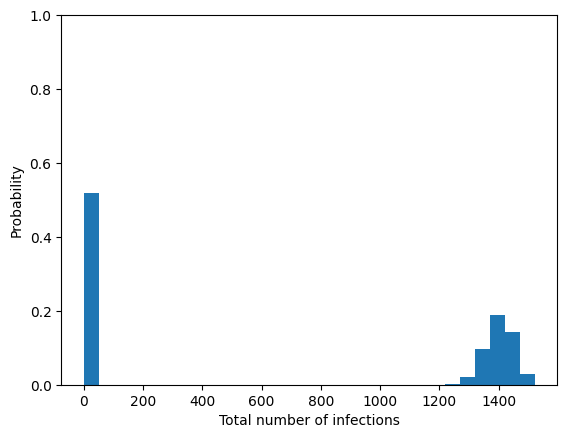

In [14]:
fig, ax = plt.subplots()
R_finals = np.asarray(infections)

ax.hist(R_finals, bins=30, weights=np.ones_like(R_finals)/len(R_finals))
ax.set_ylabel("Probability")
ax.set_xlabel("Total number of infections")
ax.set_ylim([0, 1])

In [15]:
print(f"Proportion of major outbreaks: {np.sum(infections/N > 0.2)/number_of_sims}")

Proportion of major outbreaks: 0.48


## First Step Analysis



We denote the probability that an major outbreak fails to develop from $i$ infected individuals by $q_i$. By a branching process assumption we have that $q_m=q_1^m$.

From a single infection, the law of total probability gives
$$
\begin{align*}
\mathbb{P}(\text{no major outbreak}) =& \mathbb{P}(\text{no major outbreak}|\text{first event is infection})\cdot\mathbb{P}(\text{first event is infection})\\
&+\mathbb{P}(\text{no major outbreak}|\text{first event is removal})\cdot\mathbb{P}(\text{first event is removal})\\
&+\mathbb{P}(\text{no major outbreak}|\text{first event is become susceptible again})\cdot\mathbb{P}(\text{first event is become susceptible again}).
\end{align*}
$$
We also have that
$$
\begin{align*}
\mathbb{P}(\text{first event is infection})&=\frac{\beta}{\beta+k_1+k_2}\\
\mathbb{P}(\text{first event is removal})&=\frac{k_1}{\beta+k_1+k_2}\\
\mathbb{P}(\text{first event is become susceptible again})&=\frac{k_2}{\beta+k_1+k_2}.
\end{align*}
$$
Hence we have
$$
\begin{equation*}
q_1=\frac{\beta}{\beta+k_1+k_2}q_2 + \left(\frac{k_1}{\beta+k_1+k_2} + \frac{k_2}{\beta+k_1+k_2}\right).
\end{equation*}
$$
Applying the branching process assumption yields:
$$
\begin{equation*}
q_1=\frac{\beta}{\beta+k_1+k_2}q_1^2 + \frac{k_1+k_2}{\beta+k_1+k_2}.
\end{equation*}
$$
This is really not very exciting as this is basically exactly the same as before.


In [17]:
a = beta/(beta+k1+k2)
b = -1
c = (k1 + k2)/(beta + k1 + k2)

print(np.max(1 - np.roots([a,b,c])))

0.4999999999999998


## 